In [2]:
words = open("names.txt",'r').read().splitlines()

In [3]:
b = {}
for w in words:
    chrs = ["<S>"] + list(w) + ["<E>"]
    for chr1,chr2 in zip(chrs[:-1],chrs[1:]):
        bigram = (chr1, chr2)
        b[bigram] = b.get(bigram,0) + 1

In [4]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [5]:
import torch

In [6]:
N = torch.zeros((27,27),dtype = torch.int64)


In [7]:
chars = sorted(list(set("".join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['.'] = 26

In [8]:

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181, 3983],
        [ 242,    0,    0,    0,  123,   44,    1,

In [9]:
itos = {i:s for i,s in enumerate(chars)}
itos[26] = '.'

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

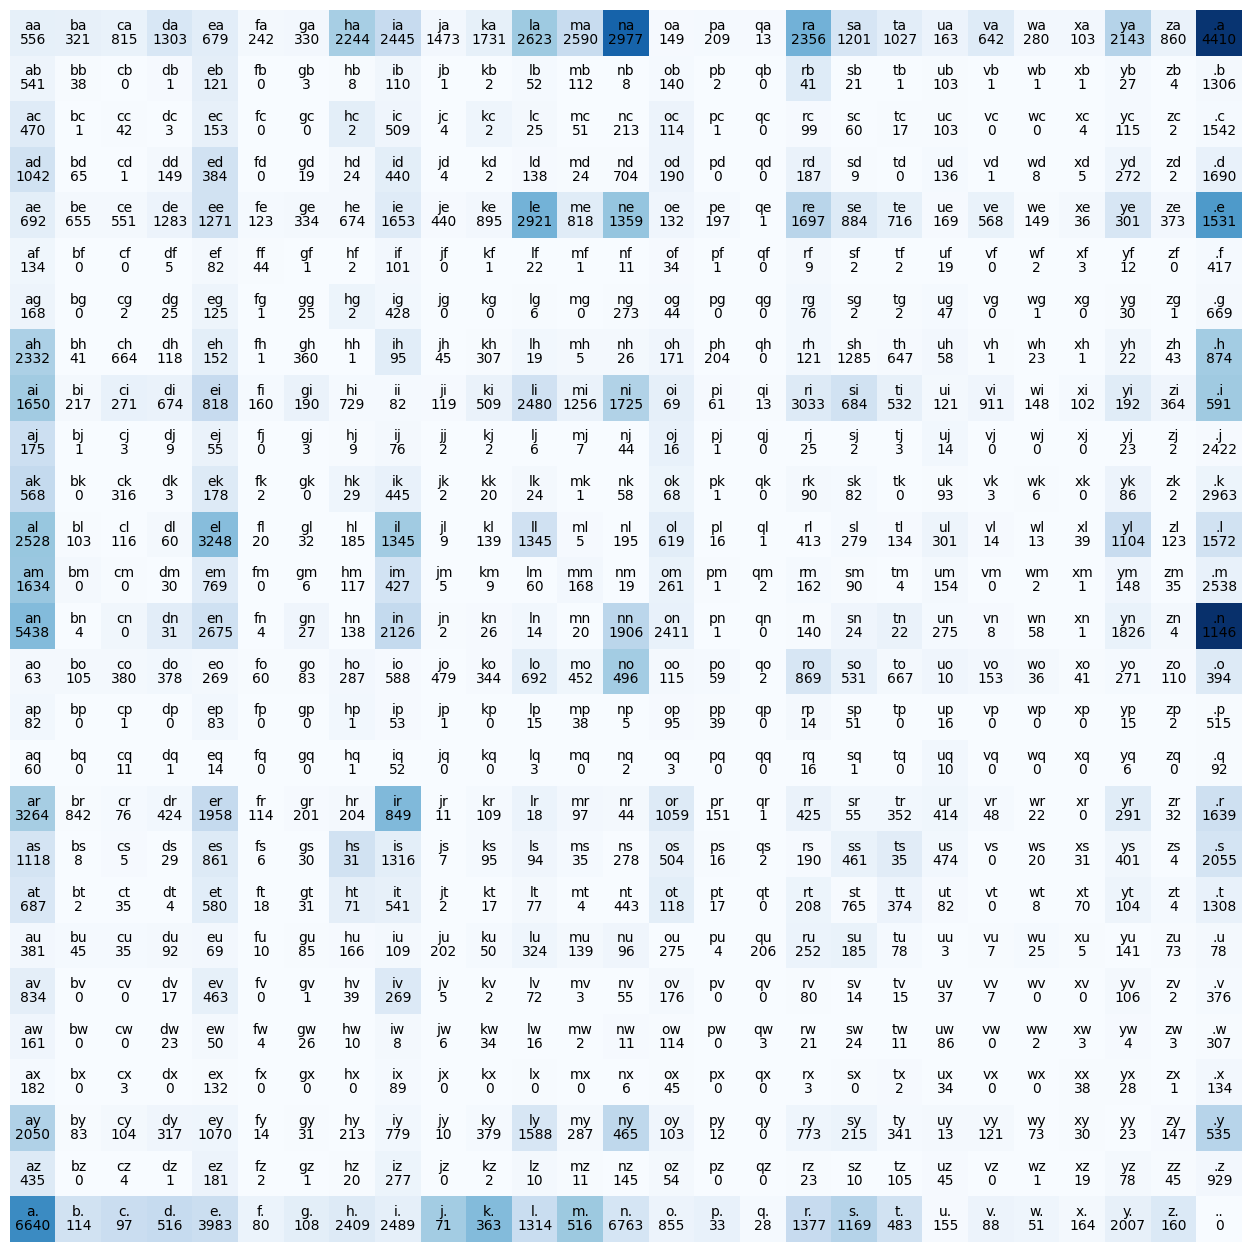

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N,cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(i,j,chstr,va='bottom',ha="center")
        plt.text(i,j,N[i,j].item(),va='top',ha = "center")
plt.axis('off')  

In [11]:
P = N[0].float()
P = P/P.sum()

In [12]:
g = torch.Generator().manual_seed(2147483647)
test = torch.rand((3,1),generator=g)
test

tensor([[0.7081],
        [0.3542],
        [0.1054]])

In [13]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    ix = 26
    out = []
    while True:
        p = N[ix].float()
        # display(p)
        p = p/p.sum()
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        if ix == 26:
            break
        next_char = itos[ix]
        out.append(next_char)
    name = ''.join(out)
    print(name)


ka
kenen
lyri
ara
gri
beonaneiasaupide
tah
r
anenouba
kanan
jadaecenjos
jana
to
zadr
mbeli
ghenvilizgaeunn
a
gout
kiri
b


In [14]:
xs = []
ys = []

for w in words:
    chars = ['.'] + list(w) +['.']
    for ch1 , ch2 in zip(chars, chars[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27,27), requires_grad=True, generator=g)

In [38]:
import torch.nn.functional as F
for k in range(200):
    xenc = F.one_hot(xs,num_classes=27).float()
    logits = xenc @ w
    counts  = logits.exp() 
    probs = counts/counts.sum(1,keepdim=True)
    loss = -probs[torch.arange(228146),ys].log().mean()  + 0.01*(w**2).mean()
    if k%10 == 0:
        print(loss.item())

    w.grad = None
    loss.backward()
    w.data -= 50*w.grad
    

2.4809608459472656
2.480928659439087
2.48089861869812
2.4808707237243652
2.4808452129364014
2.480820894241333
2.4807987213134766
2.4807779788970947
2.4807584285736084
2.480740547180176
2.4807233810424805
2.4807074069976807
2.4806926250457764
2.4806787967681885
2.480665683746338
2.4806532859802246
2.4806416034698486
2.480630874633789
2.4806203842163086
2.4806108474731445


In [39]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    ix = 26
    out = []
    while True:
        x = F.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits = x @ w
        counts  = logits.exp() 
        probs = counts/counts.sum(1,keepdim=True)
        ix = torch.multinomial(probs,num_samples=1,replacement=True,generator=g).item()
        if ix == 26:
            break
        next_char = itos[ix]
        out.append(next_char)
    name = ''.join(out)
    print(name)

ka
kenen
lyri
ara
gri
beonaneiasaupide
tah
r
anenoubv
kanan


In [35]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    ix = 26
    out = []
    while True:
        p = N[ix].float()
        # display(p)
        p = p/p.sum()
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        if ix == 26:
            break
        next_char = itos[ix]
        out.append(next_char)
    name = ''.join(out)
    print(name)

ka
kenen
lyri
ara
gri
beonaneiasaupide
tah
r
anenouba
kanan
